Dataset Overview:
  Profession  Income   Credit_card_number Expiry  Security_code  Fraud
0     DOCTOR   42509     3515418493460774  07/25            251      1
1     DOCTOR   80334      213134223583196  05/32            858      1
2     LAWYER   91552     4869615013764888  03/30            755      1
3     LAWYER   43623      341063356109385  01/29            160      1
4     DOCTOR   22962  4707418777543978402  11/30            102      0

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Profession          10000 non-null  object
 1   Income              10000 non-null  int64 
 2   Credit_card_number  10000 non-null  int64 
 3   Expiry              10000 non-null  object
 4   Security_code       10000 non-null  int64 
 5   Fraud               10000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 46

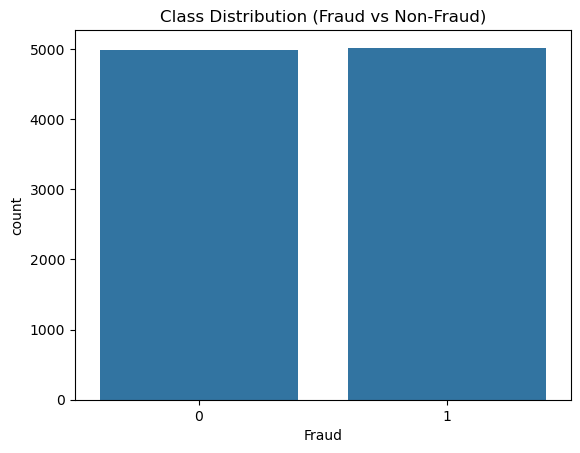

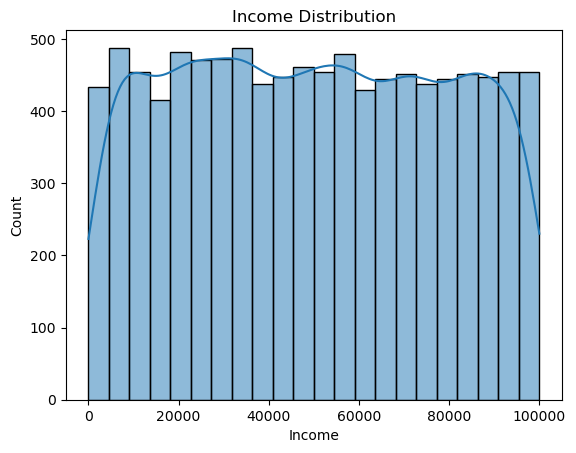

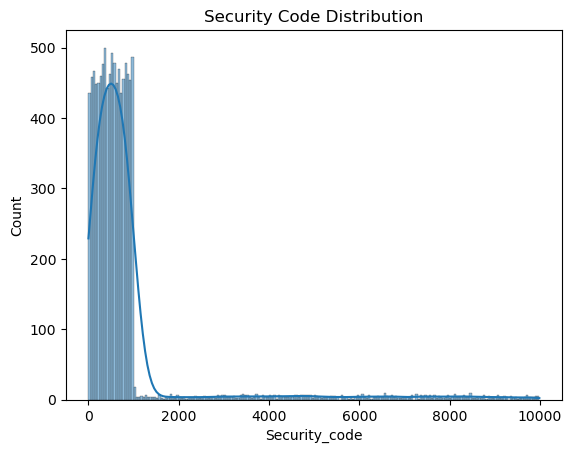

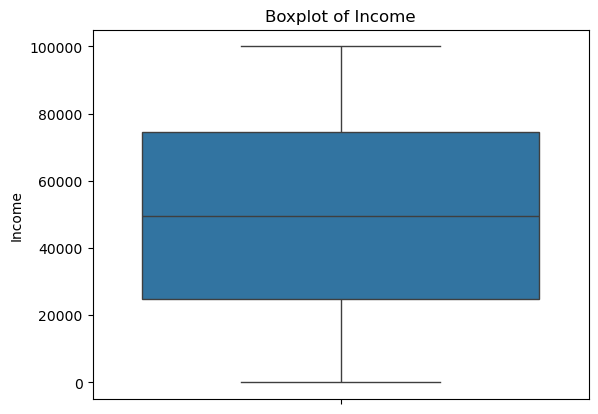

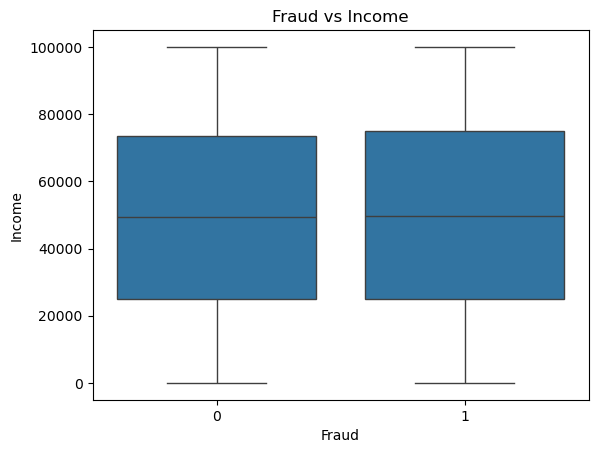

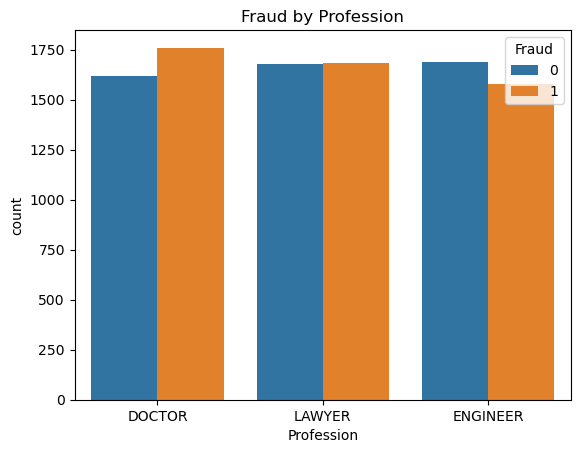

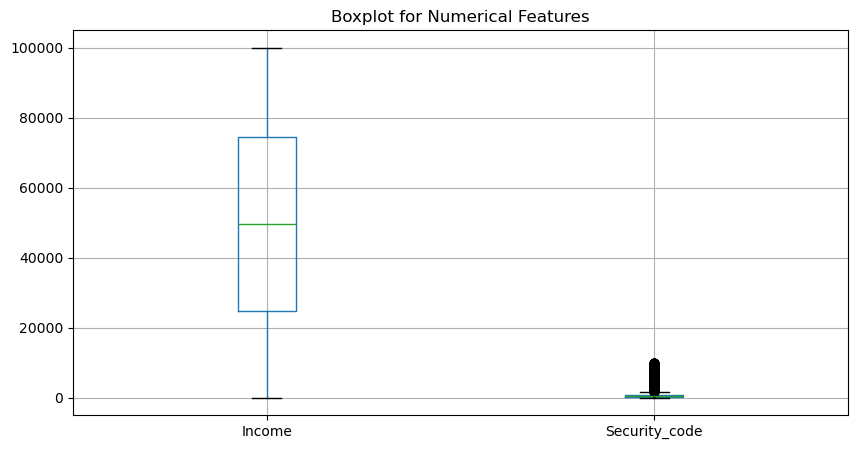

Accuracy: 0.5045
Precision: 0.5070140280561122
Confusion Matrix:
[[503 492]
 [499 506]]
Model saved as 'fraud_model.pkl'.


In [1]:


# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load the dataset
df = pd.read_csv("fraud.csv")

# EDA - Exploratory Data Analysis

# 1. Overview of the dataset
print("Dataset Overview:")
print(df.head())
print("\nColumn Information:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# 2. Class Distribution
print("\nClass Distribution:")
print(df['Fraud'].value_counts())
sns.countplot(data=df, x='Fraud')
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()

# 3. Univariate Analysis
# Income Distribution
sns.histplot(df['Income'], kde=True)
plt.title("Income Distribution")
plt.show()

# Security Code Distribution
sns.histplot(df['Security_code'], kde=True)
plt.title("Security Code Distribution")
plt.show()

# Boxplot for Income
sns.boxplot(data=df, y='Income')
plt.title("Boxplot of Income")
plt.show()

# 4. Bivariate Analysis
# Fraud vs. Income
sns.boxplot(data=df, x='Fraud', y='Income')
plt.title("Fraud vs Income")
plt.show()

# Fraud vs. Profession
sns.countplot(data=df, x='Profession', hue='Fraud')
plt.title("Fraud by Profession")
plt.show()

# 5. Outlier Detection
# Boxplot for numerical columns
df[['Income', 'Security_code']].boxplot(figsize=(10, 5))
plt.title("Boxplot for Numerical Features")
plt.show()

# 6. Feature Correlation
# Filter numeric columns only
numeric_df = df.select_dtypes(include=[np.number])  # Ensure only numeric columns are selected

# Drop rows with NaN if any
numeric_df = numeric_df.dropna()



# Data Preprocessing
df.drop(columns=['Credit_card_number', 'Expiry'], inplace=True)
df = df.drop_duplicates()

# Encode categorical variables
label_encoder = LabelEncoder()
df['Profession'] = label_encoder.fit_transform(df['Profession'])

# Scale numerical features
scaler = MinMaxScaler()
df[['Income', 'Security_code']] = scaler.fit_transform(df[['Income', 'Security_code']])

# Split data into train and test sets
X = df.drop('Fraud', axis=1)
y = df['Fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Save the trained model
pickle.dump(rf_model, open('fraud_model.pkl', 'wb'))
print("Model saved as 'fraud_model.pkl'.")